In [ ]:
#I have first tried to bi=uild a rough model;and after that used feature selection to make the model
#more ralistic; Decision Trees give the best result

In [45]:
#import packages

import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
train=pd.read_csv(r"..\upgrad intern\bank-additional\bank-additional-full.csv", delimiter=";", header=0)
train_short=pd.read_csv(r"..\upgrad intern\bank-additional\bank-additional.csv", delimiter=";", header=0)
combine=[train, train_short]
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [47]:
train_short.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [48]:
print(train.info())
print("*"*81)
print(train_short.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [49]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [50]:
train.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [51]:
train["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [52]:
job_mapping={'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,
       'retired':6, 'management':7, 'unemployed':8, 'self-employed':9, 'unknown':10,
       'entrepreneur':11, 'student':12}
for dataset in combine:
    dataset['job']=dataset['job'].map(job_mapping)
    dataset['job']=dataset['job'].fillna(0)
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,2,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,2,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,3,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,2,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [53]:
y_mapping={'no':0, 'yes':1}
for dataset in combine:
    dataset['y']=dataset['y'].map(y_mapping)
    dataset['y']=dataset['y'].fillna(0)
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [54]:
train[["y",'job']].groupby(['job'], as_index=False).mean().sort_values(by='y', ascending=False)

,job,y
11,12,0.314286
5,6,0.252326
7,8,0.142012
2,3,0.129726
6,7,0.112175
9,10,0.112121
4,5,0.108260
8,9,0.104856
0,1,0.100000
10,11,0.085165


In [55]:
marital_map={'divorced':1,'married':2,'single':3,'unknown':4}
for dataset in combine:
    dataset['marital']=dataset['marital'].map(marital_map)
    dataset['marital']=dataset['marital'].fillna(0)
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,2,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [56]:
train["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [57]:
mapping={'basic.4y':1, 'high.school':2, 'basic.6y':3, 'basic.9y':4,
       'professional.course':5, 'unknown':6, 'university.degree':7,
       'illiterate':8}
for dataset in combine:
    dataset['education']=dataset['education'].map(mapping)
    dataset['education']=dataset['education'].fillna(0)
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,2,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,2,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,2,3,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,2,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [58]:
train[["y",'education']].groupby(['education'], as_index=False).mean().sort_values(by='y', ascending=False)

,education,y
7,8,0.222222
5,6,0.145003
6,7,0.137245
4,5,0.113485
1,2,0.108355
0,1,0.102490
2,3,0.082024
3,4,0.078246


In [59]:
mapping={'no':1,'yes':2,'unknown':3}
mapping1={'failure':1,'nonexistent':3,'success':2}
for dataset in combine:
    dataset['default']=dataset['default'].map(mapping)
    dataset['default']=dataset['default'].fillna(0)
    dataset['housing']=dataset['housing'].map(mapping)
    dataset['housing']=dataset['housing'].fillna(0)
    dataset['loan']=dataset['loan'].map(mapping)
    dataset['loan']=dataset['loan'].fillna(0)    
    dataset['poutcome']=dataset['poutcome'].map(mapping)
    dataset['poutcome']=dataset['poutcome'].fillna(0) 
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,1,1,1,telephone,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,2,3,1,1,telephone,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,2,1,2,1,telephone,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,2,3,1,1,1,telephone,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,2,1,1,2,telephone,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0


In [60]:
mapping={'cellular':1,'telephone':2}
for dataset in combine:
    dataset['contact']=dataset['contact'].map(mapping)
    dataset['contact']=dataset['contact'].fillna(0)
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,1,1,1,2,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,2,3,1,1,2,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,2,1,2,1,2,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,2,3,1,1,1,2,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,2,1,1,2,2,may,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0


In [61]:
mapping={'jan':1,'feb':2,'mar':3, 'apr':4, 'may':5, 'jun':6,'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
for dataset in combine:
    dataset['month']=dataset['month'].map(mapping)
    dataset['month']=dataset['month'].fillna(0)
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,1,1,1,2,5,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,2,3,1,1,2,5,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,2,1,2,1,2,5,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,2,3,1,1,1,2,5,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,2,1,1,2,2,5,mon,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0


In [62]:
mapping={'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}
for dataset in combine:
    dataset['day_of_week']=dataset['day_of_week'].map(mapping)
    dataset['day_of_week']=dataset['day_of_week'].fillna(0)
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,1,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,2,3,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,2,1,2,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,2,3,1,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,2,1,1,2,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0


In [63]:
train_short.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,4,2,4,1,2,1,1,5,5,...,2,999,0,0.0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,2,3,2,1,1,1,2,5,5,...,4,999,0,0.0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,2,2,2,1,2,1,2,6,3,...,1,999,0,0.0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,2,2,4,1,3,3,2,6,5,...,3,999,0,0.0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,3,2,7,1,2,1,1,11,1,...,1,999,0,0.0,-0.1,93.200,-42.0,4.191,5195.8,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,1,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,2,3,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,2,1,2,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,2,3,1,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,2,1,1,2,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0


In [64]:
from sklearn.linear_model import LogisticRegression
X_train = train.drop("y", axis=1)
X_train=X_train.drop("duration", axis=1)
Y_train = train["y"]
X_test  = train_short.drop("y", axis=1)
X_test= X_test.drop("duration", axis=1)
Y_test= train_short["y"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((41188, 19), (41188,), (4119, 19), (4119,))

In [65]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_predict=logreg.predict(X_test)
acc_log=round(logreg.score(X_test,Y_test)*100,2)
acc_log

90.26

In [66]:
coeff_df=pd.DataFrame(train.columns)
coeff_df.columns=['Feature']
coeff_df['Correlation']=pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
15,emp.var.rate,0.294695
2,marital,0.057062
9,day_of_week,0.045299
3,education,0.032840
16,cons.price.idx,0.028896
8,month,0.019797
1,job,0.008753
0,age,0.004830
13,previous,0.000000
11,campaign,-0.001547


In [67]:
from sklearn.svm import SVC, LinearSVC
svc=SVC()

In [186]:
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [187]:
y_predict=svc.predict(X_test)

In [188]:
acc_svc=round(svc.score(X_test,Y_test)*100,2)
acc_svc

98.45

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

92.3

In [69]:
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
y_predict=linear_svc.predict(X_test)
acc_linear_svc=round(linear_svc.score(X_test,Y_test)*100,2)
acc_linear_svc

90.24

In [70]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

99.37

In [71]:
train[["y",'day_of_week']].groupby(['day_of_week'], as_index=False).mean().sort_values(by='y', ascending=False)

,day_of_week,y
3,4,0.121188
1,2,0.117800
2,3,0.116671
4,5,0.108087
0,1,0.099483


In [72]:
train[["y",'previous']].groupby(['previous'], as_index=False).mean().sort_values(by='y', ascending=False)

,previous,y
5,5,0.722222
6,6,0.600000
3,3,0.592593
4,4,0.542857
2,2,0.464191
1,1,0.212015
0,0,0.088322
7,7,0.000000


In [73]:
train.loc[train["previous"]>0, "previous"]=1
train.loc[train["previous"]==0, "previous"]=0
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,1,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,2,3,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,2,1,2,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,2,3,1,1,1,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,2,1,1,2,2,5,1,...,1,999,0,0.0,1.1,93.994,-36.4,4.857,5191.0,0


In [74]:
train[["y",'previous']].groupby(['previous'], as_index=False).mean().sort_values(by='y', ascending=False)

,previous,y
1,1,0.266489
0,0,0.088322


In [75]:
train_short.loc[train_short["previous"]>0, "previous"]=1
train_short.loc[train_short["previous"]==0, "previous"]=0
train_short.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,4,2,4,1,2,1,1,5,5,...,2,999,0,0.0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,2,3,2,1,1,1,2,5,5,...,4,999,0,0.0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,2,2,2,1,2,1,2,6,3,...,1,999,0,0.0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,2,2,4,1,3,3,2,6,5,...,3,999,0,0.0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,3,2,7,1,2,1,1,11,1,...,1,999,0,0.0,-0.1,93.200,-42.0,4.191,5195.8,0


In [76]:
train['duration_band']=pd.cut(train['duration'],5)
train[['duration_band', 'y']].groupby(['duration_band'],as_index=False).mean().sort_values(by='y',ascending=False)

,duration_band,y
2,"(1967.2, 2950.8]",0.711538
1,"(983.6, 1967.2]",0.588547
4,"(3934.4, 4918.0]",0.500000
3,"(2950.8, 3934.4]",0.384615
0,"(-4.918, 983.6]",0.100602


In [77]:
for dataset in combine:
    dataset.loc[(dataset['duration']<=983.6)&(dataset["duration"]>-4.918),'duration']=0
    dataset.loc[(dataset['duration']>983.6)&(dataset['duration']<=1967.2),'duration']=1
    dataset.loc[(dataset['duration'] > 1967.2) & (dataset['duration'] <= 2950.8), 'duration'] = 2
    dataset.loc[(dataset['duration'] > 2950.8) & (dataset['duration'] <=3934.4 ), 'duration'] = 3
    dataset.loc[ dataset['duration'] > 3934.4, 'duration']=4


train_short["duration"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4089    0
4090    0
4091    0
4092    0
4093    0
4094    0
4095    0
4096    0
4097    0
4098    0
4099    0
4100    0
4101    0
4102    0
4103    0
4104    0
4105    0
4106    0
4107    0
4108    0
4109    1
4110    0
4111    0
4112    0
4113    0
4114    0
4115    0
4116    0
4117    0
4118    0
Name: duration, Length: 4119, dtype: int64

In [78]:
train_short.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,4,2,4,1,2,1,1,5,5,...,2,999,0,0.0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,2,3,2,1,1,1,2,5,5,...,4,999,0,0.0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,2,2,2,1,2,1,2,6,3,...,1,999,0,0.0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,2,2,4,1,3,3,2,6,5,...,3,999,0,0.0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,3,2,7,1,2,1,1,11,1,...,1,999,0,0.0,-0.1,93.200,-42.0,4.191,5195.8,0


In [79]:
train.columns, train_short.columns

(Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'duration_band'],
       dtype='object'),
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
       dtype='object'))

In [82]:
train=train.drop("duration_band", axis=1)

In [83]:
X_train = train.drop("y", axis=1)
Y_train = train["y"]
X_test  = train_short.drop("y", axis=1)
Y_test= train_short["y"]

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

99.51

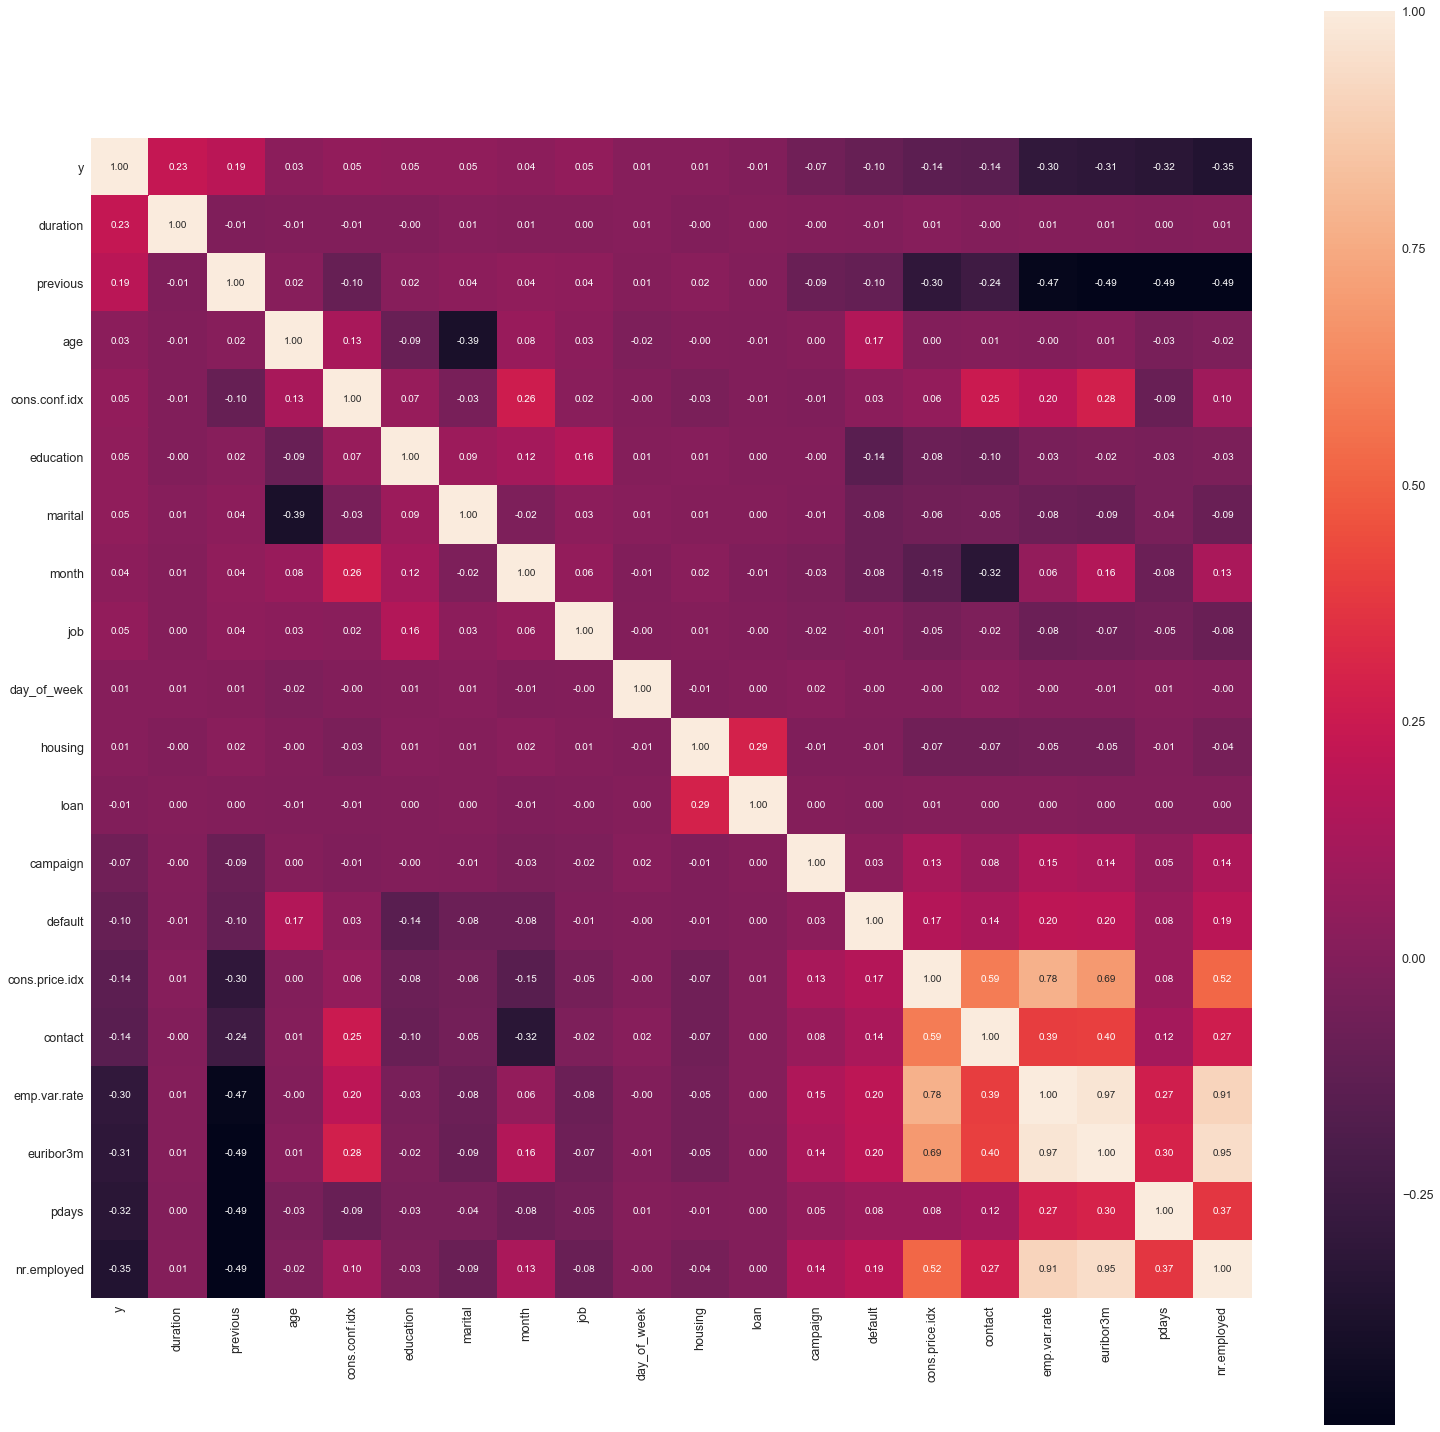

In [85]:
#Data Analysis

#Correlation Analysis
#Habitable Correlation matrix
corrmat = train_short.corr()
k = 21 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
sns.set(rc={'figure.figsize':(30,30)})
plt.show()


In [86]:
train=train.drop('euribor3m', axis=1)
train=train.drop('nr.employed', axis=1)
train_short=train_short.drop('euribor3m', axis=1)
train_short=train_short.drop("nr.employed", axis=1)

In [87]:
X_train = train.drop("y", axis=1)
Y_train = train["y"]
X_test  = train_short.drop("y", axis=1)
Y_test= train_short["y"]

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

99.47